In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [201]:
dataset=pd.read_csv('/content/drive/MyDrive/FA-KES-Dataset.csv', sep=r'\s*,\s*',header=0, encoding='latin', engine='python')
dataset


,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,"""Wed 05 Apr 2017 Syria attack symptoms consist...",nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,"""Fri 07 Apr 2017 at 0914 Homs governor says U....",nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,"""28-08-2016 Turkish Bombardment Kills 20 Civil...",manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,"""01-08-2016 5 Killed as Russian Military Chopp...",manar,8/1/2016,idlib,1


In [202]:
dataset = dataset.drop(['unit_id', 'date' ], axis = 1)

In [203]:
dataset.head()

,article_title,article_content,source,location,labels
0,Syria attack symptoms consistent with nerve ag...,"""Wed 05 Apr 2017 Syria attack symptoms consist...",nna,idlib,0
1,Homs governor says U.S. attack caused deaths b...,"""Fri 07 Apr 2017 at 0914 Homs governor says U....",nna,homs,0
2,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0
3,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0
4,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0


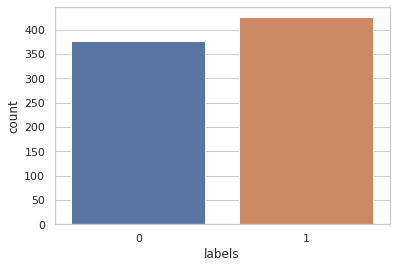

In [204]:
dataset['labels'].value_counts(normalize=True)
sns.countplot(x='labels', data=dataset)

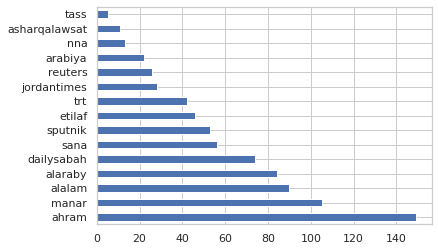

In [205]:
g=dataset['source'].value_counts()
g.plot(kind='barh')


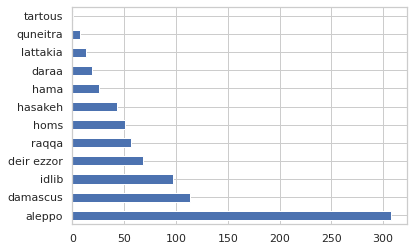

In [206]:
g=dataset['location'].value_counts()
g.plot(kind='barh')

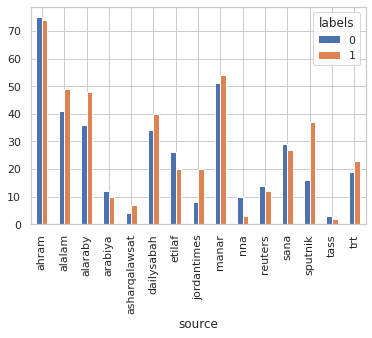

<Figure size 1440x720 with 0 Axes>

In [207]:
dataset.groupby(['source','labels']).size().unstack().plot(kind='bar',stacked=False)
plt.figure(figsize=(20,10))
plt.show()

In [208]:
dataset['final_text'] = dataset.article_title + dataset.article_content 


In [209]:
 dataset = dataset.drop(['article_title', 'article_content'], axis = 1)


In [210]:
dataset

,source,location,labels,final_text
0,nna,idlib,0,Syria attack symptoms consistent with nerve ag...
1,nna,homs,0,Homs governor says U.S. attack caused deaths b...
2,nna,aleppo,0,Death toll from Aleppo bomb attack at least 11...
3,nna,aleppo,0,Aleppo bomb blast kills six Syrian state TVWed...
4,nna,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...
...,...,...,...,...
799,manar,aleppo,1,Turkish Bombardment Kills 20 Civilians in Syri...
800,manar,aleppo,1,Martyrs as Terrorists Shell Aleppos Salah Eddi...
801,manar,aleppo,0,Chemical Attack Kills Five Syrians in Aleppo S...
802,manar,idlib,1,5 Killed as Russian Military Chopper Shot down...


In [211]:
cols = dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
dataset = dataset[cols]

In [212]:
dataset

,final_text,source,location,labels
0,Syria attack symptoms consistent with nerve ag...,nna,idlib,0
1,Homs governor says U.S. attack caused deaths b...,nna,homs,0
2,Death toll from Aleppo bomb attack at least 11...,nna,aleppo,0
3,Aleppo bomb blast kills six Syrian state TVWed...,nna,aleppo,0
4,29 Syria Rebels Dead in Fighting for Key Alepp...,nna,aleppo,0
...,...,...,...,...
799,Turkish Bombardment Kills 20 Civilians in Syri...,manar,aleppo,1
800,Martyrs as Terrorists Shell Aleppos Salah Eddi...,manar,aleppo,1
801,Chemical Attack Kills Five Syrians in Aleppo S...,manar,aleppo,0
802,5 Killed as Russian Military Chopper Shot down...,manar,idlib,1


In [230]:
x=dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]
x

,final_text,source,location
0,Syria attack symptoms consistent with nerve ag...,nna,idlib
1,Homs governor says U.S. attack caused deaths b...,nna,homs
2,Death toll from Aleppo bomb attack at least 11...,nna,aleppo
3,Aleppo bomb blast kills six Syrian state TVWed...,nna,aleppo
4,29 Syria Rebels Dead in Fighting for Key Alepp...,nna,aleppo
...,...,...,...
799,Turkish Bombardment Kills 20 Civilians in Syri...,manar,aleppo
800,Martyrs as Terrorists Shell Aleppos Salah Eddi...,manar,aleppo
801,Chemical Attack Kills Five Syrians in Aleppo S...,manar,aleppo
802,5 Killed as Russian Military Chopper Shot down...,manar,idlib


In [214]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [215]:
corpus=[]
for i in range(0,804):
  news=re.sub('[^a-zA-Z]',' ',dataset['final_text'][i])
  news=news.lower()
  news=news.split()
  ps=PorterStemmer()
  news=[ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
  news=' '.join(news)
  corpus.append(news)


In [216]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

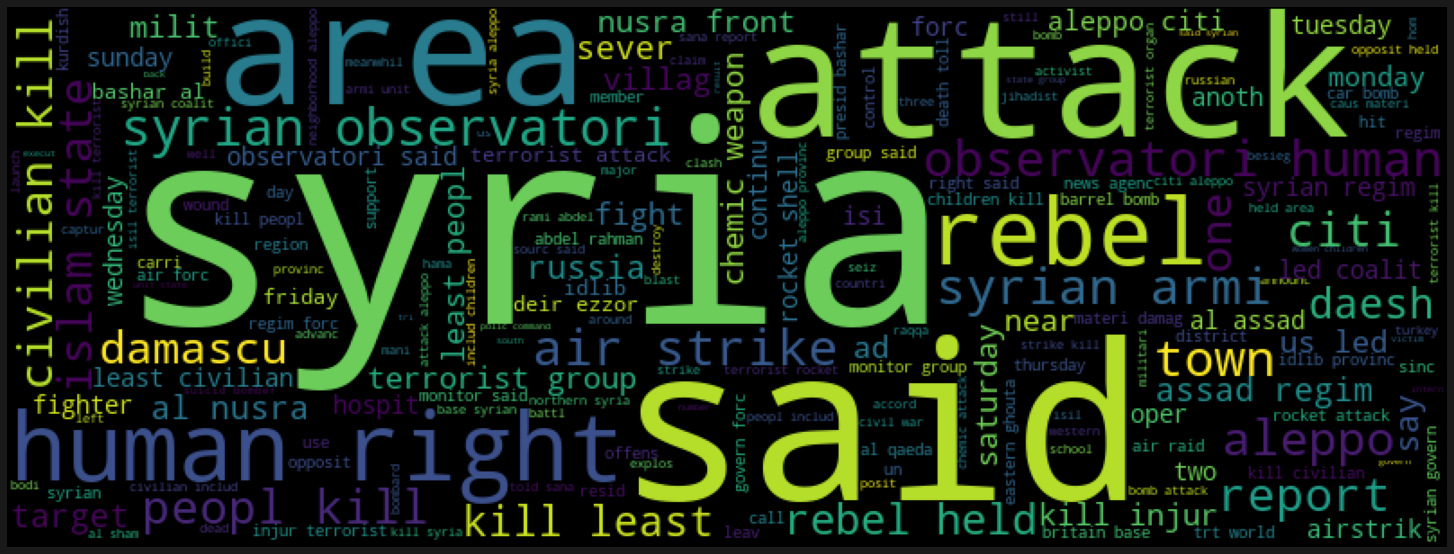

In [217]:
After_Removing_Stopwords=list(corpus)
wordcloud = WordCloud(width=800, height=300).generate(str(After_Removing_Stopwords))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [218]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
print(corpus)
#x=cv.fit_transform(corpus).toarray()
x=pd.DataFrame(cv.fit_transform(corpus).toarray(), columns=cv.get_feature_names())
# g=x[0]
# for i in g:
#   print(i)
x



['syria attack symptom consist nerv agent use wed apr syria attack symptom consist nerv agent use victim suspect chemic attack syria appear show symptom consist reaction nerv agent world health organ said wednesday case appear show addit sign consist exposur organophosphoru chemic categori chemic includ nerv agent said statement put death toll least unit state said death caus sarin nerv ga drop syrian aircraft russia said believ poison ga leak rebel chemic weapon depot struck syrian bomb sarin organophosporu compound nerv agent chlorin mustard ga also believ use past syria russian defenc ministri spokesman say agent use attack said rebel use chemic weapon aleppo last year said like kind chemic use attack suffer appar extern injuri die rapid onset similar symptom includ acut respiratori distress said expert turkey give guidanc overwhelm health worker idlib diagnosi treatment patient medicin atropin antidot type chemic exposur steroid symptomat treatment sent u n commiss inquiri human ri

,aa,aahmad,aakla,aamaq,aasmi,aazamiyeh,aazaz,abandon,abassia,abba,abbasid,abbasiya,abbasiyyeen,abboud,abd,abdah,abdallah,abdeen,abdel,abdelfattah,abdelk,abdellatif,abdelrahman,abdelsalam,abdin,abdo,abduct,abducte,abdul,abdulkarim,abdullah,abdulrahman,abdurrahman,abe,abedin,abhor,abid,abil,abl,ablaz,...,zako,zamalka,zamrani,zanki,zara,zaradesht,zarbeh,zarif,zaytan,zealand,zebdin,zeid,zein,zeinab,zeita,zeitan,zeitung,zemrin,ziad,zinki,zir,zita,ziyada,ziyadiyah,zj,zoabi,zobdani,zobdin,zone,zor,zoubi,zouhir,zour,zqaq,zubair,zubdiya,zucchini,zuhur,zw,zzor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [219]:
y

0      0
1      0
2      0
3      0
4      0
      ..
799    1
800    1
801    0
802    1
803    1
Name: labels, Length: 804, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
results=[]
names=[]



#APPLYING LOGISTIC REGRESSION

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[46 49]
 [46 60]]


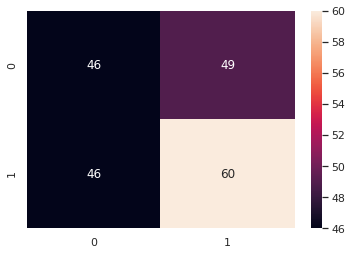

In [223]:
import seaborn as sn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
lgaccuracy=(accuracy_score(y_test, y_pred))
results.append(lgaccuracy)
name = type(classifier).__name__
names.append(name)
from matplotlib.colors import ListedColormap
sn.heatmap(cm,annot=True,fmt='d')
plt.show()

#Applying Naive Bayes

[[48 47]
 [54 52]]


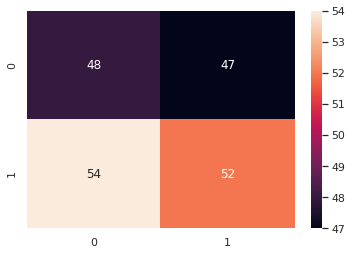

In [224]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
nbaccuracy=(accuracy_score(y_test, y_pred))
results.append(nbaccuracy)
name = type(classifier).__name__
names.append(name)
from matplotlib.colors import ListedColormap
sn.heatmap(cm,annot=True,fmt='d')
plt.show()

#Applying SVM

[[49 46]
 [46 60]]


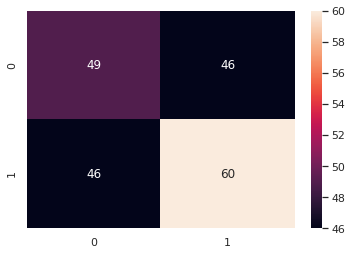

In [225]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
svmaccuracy=(accuracy_score(y_test, y_pred))
results.append(svmaccuracy)
name = type(classifier).__name__
names.append(name)
from matplotlib.colors import ListedColormap
sn.heatmap(cm,annot=True,fmt='d')
plt.show()

#Appling Decision Tree

[[40 55]
 [41 65]]


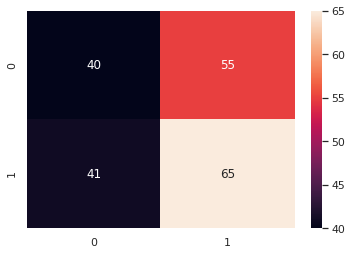

In [226]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
dtaccuracy=(accuracy_score(y_test, y_pred))
results.append(dtaccuracy)
name = type(classifier).__name__
names.append(name)
from matplotlib.colors import ListedColormap
sn.heatmap(cm,annot=True,fmt='d')
plt.show()

#Applying Random Forest

[[57 38]
 [49 57]]


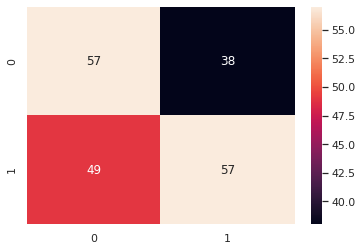

In [227]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
rfaccuracy=(accuracy_score(y_test, y_pred))
results.append(rfaccuracy)
name = type(classifier).__name__
names.append(name)
from matplotlib.colors import ListedColormap
sn.heatmap(cm,annot=True,fmt='d')
plt.show()

#COMPARISON GRAPH BETWEEN MACHINE LEARNING MODELS

In [228]:
print(results)
print(names)
df=pd.DataFrame()
df['name']=names
df['result']=results
df

[0.527363184079602, 0.4975124378109453, 0.5422885572139303, 0.5223880597014925, 0.5671641791044776]
['LogisticRegression', 'GaussianNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']


,name,result
0,LogisticRegression,0.527363
1,GaussianNB,0.497512
2,SVC,0.542289
3,DecisionTreeClassifier,0.522388
4,RandomForestClassifier,0.567164


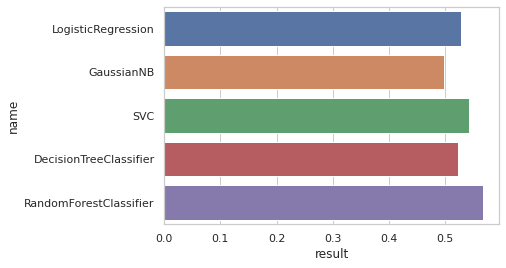

In [229]:
sns.set(style='whitegrid')
ax=sns.barplot(y='name',x='result',data=df)